In [144]:
import numpy as np
from sklearn.datasets import make_classification

In [145]:
X,y = make_classification(n_samples=100,
                        n_features=2,
                        n_informative=1,
                        n_redundant=0,
                        n_classes=2,
                        n_clusters_per_class=1,
                        hypercube=False,
                        random_state=41,
                        class_sep=10)

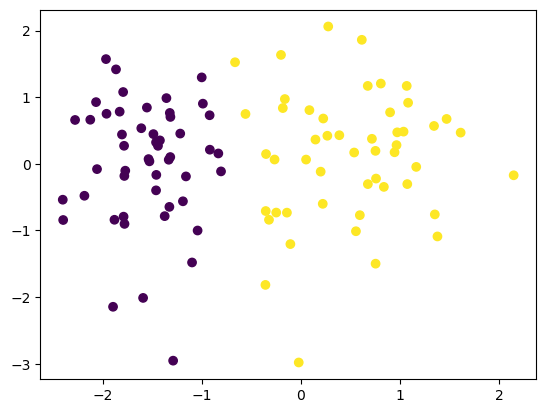

In [146]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

In [147]:
def step(z):
    return 1 if z > 0 else 0

In [148]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    epochs = 1000
    lr = 0.01
    for i in range(epochs):
        point = np.random.randint(0,X.shape[0])
        y_hat = step(np.dot(X[point],weights))
        weights = weights + lr * (y[point] - y_hat) * X[point]
    return weights[1:],weights[0]

In [149]:
w,b = perceptron(X,y)

In [150]:
w,b

(array([1.31051296, 0.24973307]), 0.9299999999999999)

In [151]:
m = -w[0]/w[1]
c = -b/w[1]

(-4.0, 4.0)

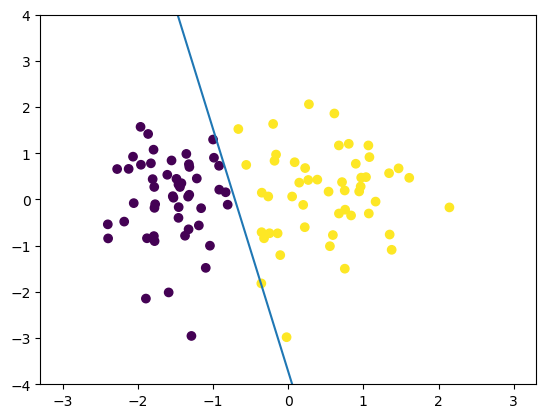

In [152]:
x_in = np.linspace(-3,3,100)
y_in_percep = m * x_in + c
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_in,y_in_percep)
plt.ylim(-4,4)

Now, lets use sklearn's LogisticRegression model and see

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
lr = LogisticRegression()
lr.fit(X,y)
w = lr.coef_
b = lr.intercept_
w,b

(array([[3.50144121, 0.02773483]]), array([2.25106636]))

In [155]:
m = -w[0][0]/w[0][1]
c = -b/w[0][1]

(-4.0, 4.0)

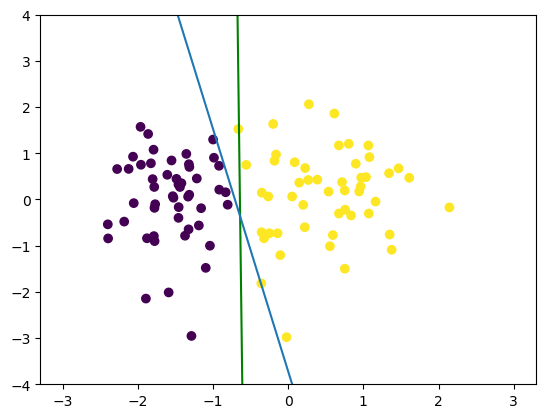

In [156]:
x_in = np.linspace(-3,3,100)
y_in_lr = m * x_in + c
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_in,y_in_lr,c='green')
plt.plot(x_in,y_in_percep)
plt.ylim(-4,4)

The green line we see what is implemented by the sklearn's actual LogistricRegression class.  
So what have we done differently?  
The perceptron trick stops at a point where it exactly classifies all the points rather than going for a best fit curve

So perceptron trick is basically not used because it just stops and doesnt find the right line